# 대중교통(서울지하철) 데이터 처리 및 시각화

- csv 모듈을 이용한 데이터 처리
- 데이터: 서울시 공공데이터 검색 => 지하철 유무임 검색 => csv 형식 파일 다운로드

### 1. 데이터 읽어오기 및 데이터 형식 변경
- 첫번쨰행(제목)은 title에 저장
- 나머지 데이터는 리스트형으로 변경해 사용

In [43]:
import csv
import pandas as pd

# 절대경로
# f=open("/Users/wondongchan/Desktop/multi/0317/subwayfree.csv", encoding = "cp949")

# 상대경로에서 파일 읽어오기
f = open("./data/subwayfree.csv", encoding = "cp949")
data = csv.reader(f)

# 첫행 title에 저장
title = next(data)
# 나머지 데이터는 리스트형으로 변경
data = list(data)
f.close()

print(title)
print(data[:5])

['사용월', '호선명', '지하철역', '유임승차인원', '무임승차인원', '유임하차인원', '무임하차인원', '작업일자']
[['202202', '1호선', '종로3가', '335905', '211468', '308127', '197301', '20220303'], ['202202', '1호선', '동대문', '164652', '85659', '152193', '83921', '20220303'], ['202202', '1호선', '서울역', '783814', '129597', '734548', '121859', '20220303'], ['202202', '1호선', '신설동', '209871', '88550', '207172', '85219', '20220303'], ['202202', '1호선', '종각', '583790', '93238', '565882', '87907', '20220303']]


data의 4번~ 7번까지 "로 묶인 데이터 => 정수형 데이터로 변경

In [44]:
# !pip install numpy

In [45]:
# 차원 확인
import numpy as np
print(np.array(data).shape)  # (행, 열)
print(np.array(data).ndim)   # 차원 확인


(56998, 8)
2


In [46]:
# 정수형 데이터 변경하기

for row in data:
    for i in range(3,7):
        row[i] = int(row[i])

print(data[:5])

[['202202', '1호선', '종로3가', 335905, 211468, 308127, 197301, '20220303'], ['202202', '1호선', '동대문', 164652, 85659, 152193, 83921, '20220303'], ['202202', '1호선', '서울역', 783814, 129597, 734548, 121859, '20220303'], ['202202', '1호선', '신설동', 209871, 88550, 207172, 85219, '20220303'], ['202202', '1호선', '종각', 583790, 93238, 565882, 87907, '20220303']]


### 2. 데이터 분석

유임 승차 비율이 가장 높은 역 정보 출력
- 비율 = 유임승차인원 / 무임승차인원
- 비율 = 유임승차 / (유임 + 무임)승차인원
- 비율이 가장 높은 라인/역이름/비율

In [47]:
# 비율 = 유임승차인원 / 무임승차인원
maxs = 0
rate = 0 
maxlst = row
for row in data:
    if row[4] == 0:    # 무인승차 0이면 다음 값으로 이동
        continue
    rate = row[3] / (row[3] + row[4])
    if rate > maxs:
        maxs = rate
        maxlst = row
        print (row, round(maxs, 2))    # round(값, 반올림 위치): 값을 입력한 위치에서 반올림

print (row, round(maxs, 2))    # round(값, 반올림 위치): 값을 입력한 위치에서 반올림

['202202', '1호선', '종로3가', 335905, 211468, 308127, 197301, '20220303'] 0.61
['202202', '1호선', '동대문', 164652, 85659, 152193, 83921, '20220303'] 0.66
['202202', '1호선', '서울역', 783814, 129597, 734548, 121859, '20220303'] 0.86
['202202', '1호선', '종각', 583790, 93238, 565882, 87907, '20220303'] 0.86
['202202', '1호선', '시청', 377162, 54426, 384421, 53390, '20220303'] 0.87
['202202', '2호선', '잠실(송파구청)', 1383281, 126825, 1351970, 120786, '20220303'] 0.92
['202202', '2호선', '삼성(무역센터)', 981108, 81755, 981775, 75105, '20220303'] 0.92
['202202', '2호선', '합정', 643930, 48341, 674433, 47883, '20220303'] 0.93
['202202', '2호선', '홍대입구', 1235312, 68030, 1265503, 65322, '20220303'] 0.95
['202202', '7호선', '상동', 19, 1, 0, 0, '20220303'] 0.95
['202202', '경부선', '서울역', 148368, 7191, 44210, 1823, '20220303'] 0.95
['202111', '3호선', '충무로', 33, 1, 0, 0, '20211203'] 0.97
['202110', '6호선', '연신내', 47, 1, 0, 0, '20211103'] 0.98
['201809', '3호선', '충무로', 55, 1, 0, 0, '20181003'] 0.98
['201806', '3호선', '충무로', 60, 1, 0, 0, '201807

In [54]:
## (유임+무임) 값이 10만명 이상인 데이터들 중에서 선택
maxs = 0
rate = 0 
maxlst = row
for row in data:
    if row[4] != 0 and (row[3] + row[4]) >= 100000:
        rate = row[3] / (row[3] + row[4])
        
    if rate > maxs:
        maxs = rate
        maxlst = row
        print (f'역이름:{row[2]}, 라인:{row[1]}, 비율:{round(maxs, 2)}')

print (f'역이름:{maxlst[2]}, 라인:{maxlst[1]}, 비율:{round(maxs, 2)}')

역이름:종로3가, 라인:1호선, 비율:0.61
역이름:동대문, 라인:1호선, 비율:0.66
역이름:서울역, 라인:1호선, 비율:0.86
역이름:종각, 라인:1호선, 비율:0.86
역이름:시청, 라인:1호선, 비율:0.87
역이름:잠실(송파구청), 라인:2호선, 비율:0.92
역이름:삼성(무역센터), 라인:2호선, 비율:0.92
역이름:합정, 라인:2호선, 비율:0.93
역이름:홍대입구, 라인:2호선, 비율:0.95
역이름:서울역, 라인:경부선, 비율:0.95
역이름:마곡나루(서울식물원), 라인:공항철도 1호선, 비율:0.95
역이름:마곡나루(서울식물원), 라인:공항철도 1호선, 비율:0.96
역이름:마곡나루, 라인:공항철도 1호선, 비율:0.96
역이름:한양대, 라인:2호선, 비율:0.96
역이름:한양대, 라인:2호선, 비율:0.96
역이름:한양대, 라인:2호선, 비율:0.96
역이름:한양대, 라인:2호선, 비율:0.96
역이름:한양대, 라인:2호선, 비율:0.96


In [56]:
## 무료 비율이 높은 역/호선/비율 출력
maxs = 0
rate = 0 
maxlst = row
for row in data:
    if row[4] != 0 and (row[3] + row[4]) >= 100000:
        rate = row[4] / (row[3] + row[4])
        
    if rate > maxs:
        maxs = rate
        maxlst = row
        print (f'역이름:{row[2]}, 라인:{row[1]}, 비율:{round(maxs, 2)}')

print (f'역이름:{maxlst[2]}, 라인:{maxlst[1]}, 비율:{round(maxs, 2)}')

역이름:종로3가, 라인:1호선, 비율:0.39
역이름:청량리(서울시립대입구), 라인:1호선, 비율:0.43
역이름:제기동, 라인:1호선, 비율:0.52
역이름:동묘앞, 라인:1호선, 비율:0.55
역이름:제기동, 라인:1호선, 비율:0.56
역이름:소요산, 라인:경원선, 비율:0.66
역이름:소요산, 라인:경원선, 비율:0.68
역이름:소요산, 라인:경원선, 비율:0.68


모든 역을 기준으로 유임승차/유임하차/무임승차/무임하차 인원이 가장 많은 역 찾기

In [96]:
label = ["유임승차", "무임승차", "유임하차", "무임하차"]
mxstation = [""] * 4
mx = [0] * 4
for row in data:
    for i in range(3,7):
        if row[i] > mx[i-3]:
            mx[i-3] = row[i]
            mxstation[i-3] = f"사용월: {row[0]} / 라인: {row[1]} / 역이름: {row[2]}역 / 인원수: {mx[i-3]}"

for i in range(4):
    print(f"{label[i]} - {mxstation[i]}\n")
        
#     if row[3] >= mx[0]:    #유임승차
#         mx[0] = row[3]
#     mxstation[0] = mx[0]
    
#     if row[4] >= mx[1]:    #무임승차
#         mx[1] = row[4]
#     mxstation[1] = mx[1]
    
#     if row[5] >= mx[2]:    #유임하차
#         mx[2] = row[5]
#     mxstation[2] = mx[2]
    
#     if row[6] >= mx[3]:    #무임하차
#         mx[3] = row[6]
#     mxstation[3] = mx[3]

# print (f'유임승차: {mxstation[0]} / {mx[0]}명\n무임승차: {mxstation[1]} / {mx[1]}명\n유임하차: {mxstation[2]} / {mx[2]}명\n무임하차: {mxstation[3]} / {mx[3]}명')

유임승차 - 사용월: 201501 / 라인: 2호선 / 역이름: 강남역 / 인원수: 3266271

무임승차 - 사용월: 201501 / 라인: 2호선 / 역이름: 강남역 / 인원수: 3353256

유임하차 - 사용월: 201607 / 라인: 2호선 / 역이름: 강남역 / 인원수: 3265282

무임하차 - 사용월: 201901 / 라인: 1호선 / 역이름: 제기동역 / 인원수: 400607



선택한 라인에 있는 역을 기준으로 유무임 승하차 비율 계산

In [116]:
label = ["유임승차", "무임승차", "유임하차", "무임하차"]
mxstation = [""] * 4
mx = [0] * 4
staname = input("호선명을 입력하세요.:")
for row in data:
    for i in range(3,7):
        if row[i] > mx[i-3] and row[1] == staname:
            mx[i-3] = row[i]
            mxstation[i-3] = f"사용월: {row[0]} / 라인: {row[1]} / 역이름: {row[2]}역 / 인원수: {mx[i-3]}"
print("호선명: ",staname)
for i in range(4):
    print(f"{label[i]} - {mxstation[i]}\n")

호선명을 입력하세요.:1호선
호선명:  1호선
유임승차 - 사용월: 201501 / 라인: 1호선 / 역이름: 서울역역 / 인원수: 1890411

무임승차 - 사용월: 201503 / 라인: 1호선 / 역이름: 서울역역 / 인원수: 1682965

유임하차 - 사용월: 201512 / 라인: 1호선 / 역이름: 서울역역 / 인원수: 1574932

무임하차 - 사용월: 201901 / 라인: 1호선 / 역이름: 제기동역 / 인원수: 400607



In [124]:
# 에러 처리
# 호선명 입력시 오류가 발생하면 "호선명을 잘못 입력하셨습니다."
# 라는 메세지 전달 후 다시 입력 받기
# 개별적으로 작성하세요.

label = ["유임승차", "무임승차", "유임하차", "무임하차"]
mxstation = [""] * 4
mx = [0] * 4
staname = input("호선명을 입력하세요.:")
for row in data:
    for i in range(3,7):
        if row[i] > mx[i-3] and staname in row[1]:
            mx[i-3] = row[i]
            mxstation[i-3] = f"사용년월: {row[0]} / 라인: {row[1]} / 역이름: {row[2]}역 / 인원수: {mx[i-3]}"
print("호선명: ",staname)
for i in range(4):
    print(f"{label[i]} - {mxstation[i]}\n")

호선명을 입력하세요.:항철
호선명:  항철
유임승차 - 사용년월: 201708 / 라인: 공항철도 1호선 / 역이름: 인천국제공항역 / 인원수: 545461

무임승차 - 사용년월: 201510 / 라인: 공항철도 1호선 / 역이름: 검암역 / 인원수: 456728

유임하차 - 사용년월: 201908 / 라인: 공항철도 1호선 / 역이름: 인천공항1터미널역 / 인원수: 514175

무임하차 - 사용년월: 201608 / 라인: 공항철도 1호선 / 역이름: 인천국제공항역 / 인원수: 78041



In [129]:
label = ["유임승차", "무임승차", "유임하차", "무임하차"]
mxstation = [""] * 4
mx = [0] * 4
staname = input("호선명을 입력하세요.:")
for row in data:
    for i in range(3,7):
        if row[i] > mx[i-3] and staname in row[1]:
            mx[i-3] = row[i]
            mxstation[i-3] = row[:-1]
print("호선명: ",staname)
for i in range(4):
    print(f"{label[i]} - {mxstation[i]}/{mx[i]}\n")

호선명을 입력하세요.:1호선
호선명:  1호선
유임승차 - ['201501', '1호선', '서울역', 1890411, 1667163, 238403, 220008]/1890411

무임승차 - ['201503', '1호선', '서울역', 1880246, 1682965, 251663, 232039]/1682965

유임하차 - ['201512', '1호선', '서울역', 1795435, 235606, 1574932, 216587]/1574932

무임하차 - ['201901', '1호선', '제기동', 293540, 374571, 288217, 400607]/400607



In [133]:
mxstation[0][3:]

[1890411, 1667163, 238403, 220008]

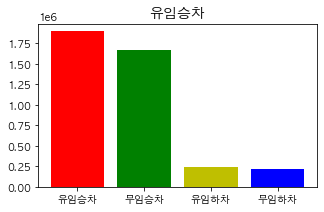

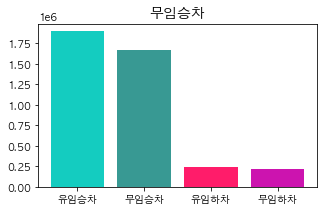

In [175]:
## bar 차트 작성하기
#!pip install matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc

rc('font', family='AppleGothic')

plt.figure(figsize=(5, 3))
plt.bar(label, mxstation[0][3:], color = ["r", "g", "y", "b"])
plt.title(label[0], size = 14)
plt.show()

plt.figure(figsize=(5, 3))
plt.bar(label, mxstation[0][3:], color = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF'])
plt.title(label[1], size = 14)
plt.show()

In [178]:
import csv
import pandas as pd

# 절대경로
# f=open("/Users/wondongchan/Desktop/multi/0317/subwayfree.csv", encoding = "cp949")

# 상대경로에서 파일 읽어오기
f = open("./data/subwayfree.csv", encoding = "cp949")
data = csv.reader(f)

# 첫행 title에 저장
title = next(data)
# 나머지 데이터는 리스트형으로 변경
data = list(data)
f.close()


label = ["유임승차", "무임승차", "유임하차", "무임하차"]
mxstation = [""] * 4
mx = [0] * 4
staname = input("호선명을 입력하세요.:")
        
    
for row in data:
    for i in range(3,7):
        row[i] = int(row[i])    # 정수형 데이터 변경하기
        
    for i in range(3,7):
        if row[i] > mx[i-3] and staname in row[1]:
            mx[i-3] = row[i]
            mxstation[i-3] = row[:-1]
            
print("\n호선명: ",staname)
for i in range(4):
    print(f"{label[i]} - {mxstation[i]}\n")

호선명을 입력하세요.:1호선

호선명:  1호선
유임승차 - ['201501', '1호선', '서울역', 1890411, 1667163, 238403, 220008]

무임승차 - ['201503', '1호선', '서울역', 1880246, 1682965, 251663, 232039]

유임하차 - ['201512', '1호선', '서울역', 1795435, 235606, 1574932, 216587]

무임하차 - ['201901', '1호선', '제기동', 293540, 374571, 288217, 400607]



# 호선명 고유값 찾기

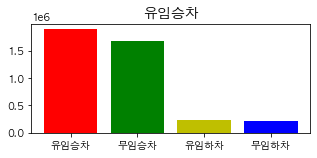

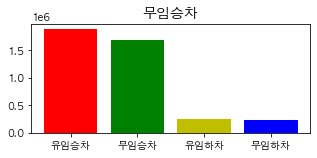

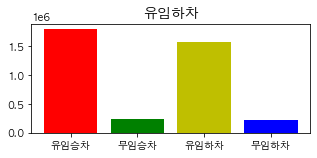

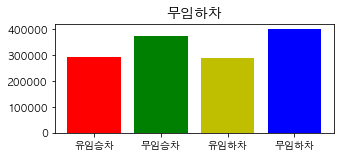

In [180]:
## bar 차트 작성하기
#!pip install matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc

rc('font', family='AppleGothic')

for i in range(4):
    plt.figure(figsize=(5,2))
    plt.bar(label, mxstation[i][3:], color = ["r", "g", "y", "b"])
    plt.title(label[i], size = 14)
    
    # 차트 저장(반드시 show 명령 전에 와야함)
#     plt.savefig(label[i] + mxstation[i][1] + "_" + mxstation[i][2] + ".jpg")
    plt.show()

SyntaxError: invalid syntax (3060290997.py, line 1)

In [55]:
title

['사용월', '호선명', '지하철역', '유임승차인원', '무임승차인원', '유임하차인원', '무임하차인원', '작업일자']